In [33]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import scipy
import h5py
from scipy.stats import entropy
from scipy.spatial.distance import pdist, squareform
import scipy.cluster.hierarchy as _sch
from collections import Counter
from activ import load_data
from math import ceil
import seaborn as sns
import pandas as pd

In [2]:
def conf_alliter(size, predicted, actual):
    confalliter = []
    for j in range(50):
        conf = np.zeros((size,size))
        labs = list(map(int, actual[j][size-2]))
        preds = list(map(int, predicted[j][size-2]))
        for l, p in zip(labs, preds):
            conf[l,p] += 1
        confalliter.append(conf)
    return confalliter

In [3]:
def accuracy(mat):
    return mat.trace()/mat.sum()

def specificity(tn, fp):
    return tn/(tn+fp)

def sensitivity(tp, fn):
    return tp/(tp+fn)

def fscore(tp, fp, fn):
    return (2*tp)/(2*tp+fp+fn)

In [4]:
path = '/Users/ahyeon/Desktop/activ/results/features_dropped/bm_features_dropped/single_dim/dim_2_bm_dropped_result_0.h5'
f = h5py.File(path, 'r')
predictions = np.squeeze(f['score'][:], axis=1)
norm_predictions = np.squeeze(f['norm_score'][:], axis=1)
cluster_sizes = f['cluster_sizes'][:]
labels = np.squeeze(f['clusters'][:], axis=1)


In [5]:
fold_over_chance = np.zeros((len(cluster_sizes), 50))
raw_acc = np.zeros((len(cluster_sizes), 50))
normalized_acc = np.zeros((len(cluster_sizes), 50))
for jj,c in enumerate(cluster_sizes):
    all50mat = conf_alliter(c, predictions, labels)
    norm_all50mat = conf_alliter(c, norm_predictions, labels)
    acc = [accuracy(i) for i in all50mat]
    norm_acc = [accuracy(i) for i in norm_all50mat]
    foc = [float(x/y) for x, y in zip(acc, norm_acc)]
    fold_over_chance[jj,:] = foc
    raw_acc[jj,:] = acc
    normalized_acc[jj,:] = norm_acc
    

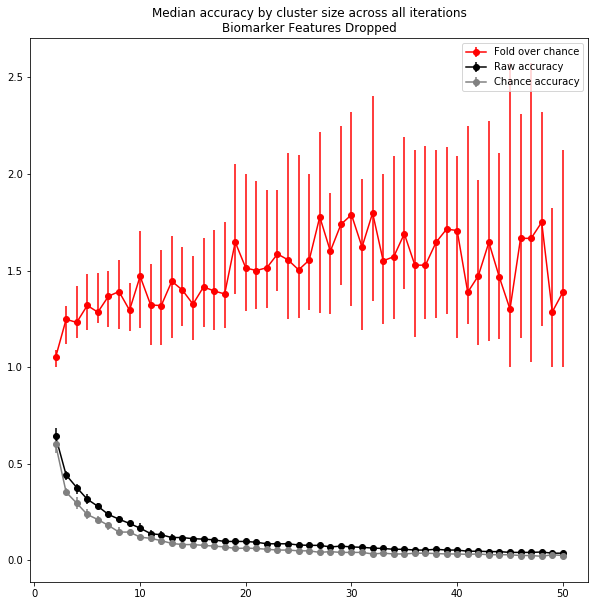

In [67]:
# biomarker plot with error bars
fig, ax = plt.subplots(figsize=(10,10))
lower = [np.percentile(fold_over_chance[i,:], 25) for i in range(49)]
upper = [np.percentile(fold_over_chance[i,:], 75) for i in range(49)]
med = np.median(fold_over_chance, axis=1)
raw_med = np.median(raw_acc, axis=1)
raw_lower = [np.percentile(raw_acc[i,:], 25) for i in range(49)]
raw_upper = [np.percentile(raw_acc[i,:], 75) for i in range(49)]
norm_med = np.median(normalized_acc, axis=1)
norm_lower = [np.percentile(normalized_acc[i,:], 25) for i in range(49)]
norm_upper = [np.percentile(normalized_acc[i,:], 75) for i in range(49)]
plt.errorbar(cluster_sizes, med, yerr=[med-lower,upper-med], color = 'red',fmt='-o', label='Fold over chance')
plt.errorbar(cluster_sizes, raw_med, yerr=[raw_med-raw_lower,raw_upper-raw_med], color='black',fmt='-o', label='Raw accuracy')
plt.errorbar(cluster_sizes, norm_med, yerr=[norm_med-norm_lower, norm_upper-norm_med], color='grey',fmt='-o', label='Chance accuracy')
plt.legend()
plt.title("Median accuracy by cluster size across all iterations\nBiomarker Features Dropped")

plt.show()

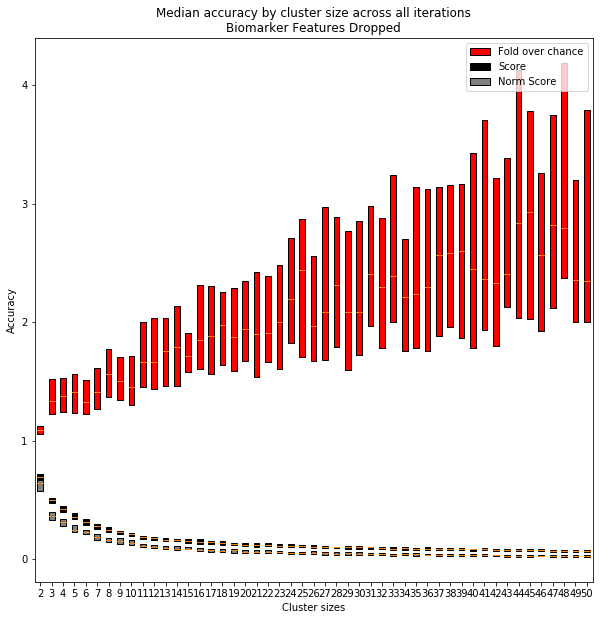

In [77]:
fig, ax = plt.subplots(figsize=(10,10))

medianprops = dict(linewidth=3, color='white')
foc = ax.boxplot(fold_over_chance.T, positions=cluster_sizes, showfliers=False, whis=False, patch_artist=True, boxprops=dict(facecolor="red"))
raw = ax.boxplot(raw_acc.T, positions=cluster_sizes, showfliers=False, whis=False, patch_artist=True, boxprops=dict(facecolor="black"))
norm = ax.boxplot(normalized_acc.T, positions=cluster_sizes, showfliers=False, whis=False, patch_artist=True, boxprops=dict(facecolor="grey"))

ax.legend([foc["boxes"][0],raw["boxes"][0],norm["boxes"][0]], ['Fold over chance', 'Score', 'Norm Score'], loc='upper right')

plt.title("Median accuracy by cluster size across all iterations\nBiomarker Features Dropped")
plt.xlabel("Cluster sizes")
plt.ylabel("Accuracy")
plt.show()

In [125]:
fig, ax = plt.subplots(figsize=(10,10))

medianprops = dict(linewidth=3, color='white')
foc = ax.boxplot(fold_over_chance.T, positions=cluster_sizes, showfliers=False, whis=False, patch_artist=True, boxprops=dict(facecolor="red"), showbox=False)
raw = ax.boxplot(raw_acc.T, positions=cluster_sizes, showfliers=False, whis=False, patch_artist=True, boxprops=dict(facecolor="black"))
norm = ax.boxplot(normalized_acc.T, positions=cluster_sizes, showfliers=False, whis=False, patch_artist=True, boxprops=dict(facecolor="grey"))

ax.legend([foc["boxes"][0],raw["boxes"][0],norm["boxes"][0]], ['Fold over chance', 'Score', 'Norm Score'], loc='upper right')

plt.title("Median accuracy by cluster size across all iterations\nBiomarker Features Dropped")
plt.xlabel("Cluster sizes")
plt.ylabel("Accuracy")
plt.show()

IndexError: list index out of range

In [69]:
# outcomes
path2 = '/Users/ahyeon/Desktop/activ/results/features_dropped/oc_features_dropped/single_dim/dim_2_oc_dropped_result_0.h5'
f2 = h5py.File(path2, 'r')
predictions = np.squeeze(f2['score'][:], axis=1)
norm_predictions = np.squeeze(f2['norm_score'][:], axis=1)
cluster_sizes = f2['cluster_sizes'][:]
labels = np.squeeze(f2['clusters'][:], axis=1)

In [72]:
oc_fold_over_chance = np.zeros((len(cluster_sizes), 50))
oc_raw_acc = np.zeros((len(cluster_sizes), 50))
oc_normalized_acc = np.zeros((len(cluster_sizes), 50))
for jj,c in enumerate(cluster_sizes):
    all50mat = conf_alliter(c, predictions, labels)
    norm_all50mat = conf_alliter(c, norm_predictions, labels)
    acc = [accuracy(i) for i in all50mat]
    norm_acc = [accuracy(i) for i in norm_all50mat]
    foc = [float(x/y) for x, y in zip(acc, norm_acc)]
    oc_fold_over_chance[jj,:] = foc
    oc_raw_acc[jj,:] = acc
    oc_normalized_acc[jj,:] = norm_acc
    

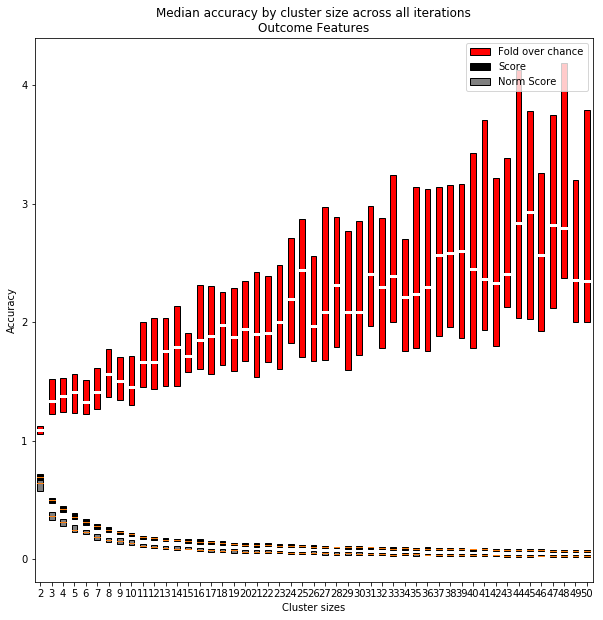

In [73]:
fig, ax = plt.subplots(figsize=(10,10))

medianprops = dict(linewidth=3, color='white')
foc = ax.boxplot(oc_fold_over_chance.T, positions=cluster_sizes, showfliers=False, whis=False, patch_artist=True, boxprops=dict(facecolor="red"), medianprops=medianprops)
raw = ax.boxplot(oc_raw_acc.T, positions=cluster_sizes, showfliers=False, whis=False, patch_artist=True, boxprops=dict(facecolor="black"))
norm = ax.boxplot(oc_normalized_acc.T, positions=cluster_sizes, showfliers=False, whis=False, patch_artist=True, boxprops=dict(facecolor="grey"))

ax.legend([foc["boxes"][0],raw["boxes"][0],norm["boxes"][0]], ['Fold over chance', 'Score', 'Norm Score'], loc='upper right')

plt.title("Median accuracy by cluster size across all iterations\nOutcome Features")
plt.xlabel("Cluster sizes")
plt.ylabel("Accuracy")
plt.show()

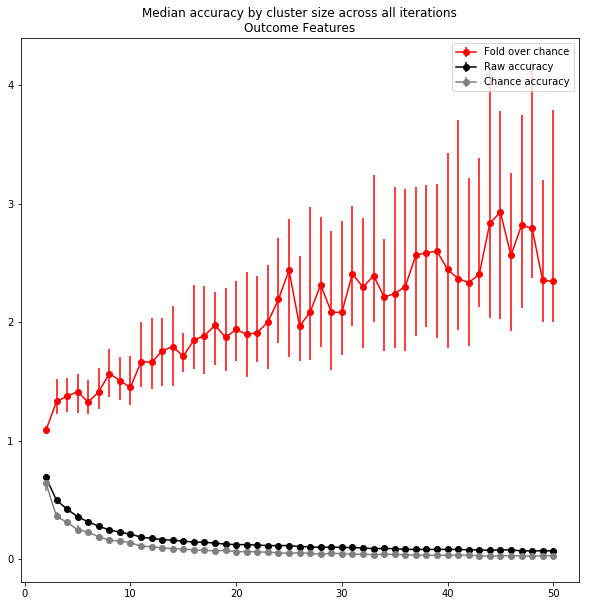

<Figure size 432x288 with 0 Axes>

In [103]:
# outcome plot with error bars
fig, ax = plt.subplots(figsize=(10,10))
lower = [np.percentile(oc_fold_over_chance[i,:], 25) for i in range(49)]
upper = [np.percentile(oc_fold_over_chance[i,:], 75) for i in range(49)]
med = np.median(oc_fold_over_chance, axis=1)
raw_med = np.median(oc_raw_acc, axis=1)
raw_lower = [np.percentile(oc_raw_acc[i,:], 25) for i in range(49)]
raw_upper = [np.percentile(oc_raw_acc[i,:], 75) for i in range(49)]
norm_med = np.median(oc_normalized_acc, axis=1)
norm_lower = [np.percentile(oc_normalized_acc[i,:], 25) for i in range(49)]
norm_upper = [np.percentile(oc_normalized_acc[i,:], 75) for i in range(49)]
plt.errorbar(cluster_sizes, med, yerr=[med-lower,upper-med], color = 'red',fmt='-o', label='Fold over chance')
plt.errorbar(cluster_sizes, raw_med, yerr=[raw_med-raw_lower,raw_upper-raw_med], color='black',fmt='-o', label='Raw accuracy')
plt.errorbar(cluster_sizes, norm_med, yerr=[norm_med-norm_lower, norm_upper-norm_med], color='grey',fmt='-o', label='Chance accuracy')
plt.legend()
plt.title("Median accuracy by cluster size across all iterations\nOutcome Features")
plt.show()


# Dim2 Results (default outcomes and biomarkers)

In [81]:

file = '/Users/ahyeon/Desktop/activ/results/dim2/dim2_result.h5'
f = h5py.File(file, 'r')
predictions = np.squeeze(f['score'][:], axis=1)
norm_predictions = np.squeeze(f['norm_score'][:], axis=1)
cluster_sizes = f['cluster_sizes'][:]
labels = np.squeeze(f['clusters'][:], axis=1)

In [104]:
fold_over_chance = np.zeros((len(cluster_sizes), 50))
raw_acc = np.zeros((len(cluster_sizes), 50))
normalized_acc = np.zeros((len(cluster_sizes), 50))
for jj,c in enumerate(cluster_sizes):
    all50mat = conf_alliter(c, predictions, labels)
    norm_all50mat = conf_alliter(c, norm_predictions, labels)
    acc = [accuracy(i) for i in all50mat]
    norm_acc = [accuracy(i) for i in norm_all50mat]
    foc = [float(x/y) for x, y in zip(acc, norm_acc)]
    fold_over_chance[jj,:] = foc
    raw_acc[jj,:] = acc
    normalized_acc[jj,:] = norm_acc

In [100]:
# log transform
# fold_over_chance = np.log(fold_over_chance)
# raw_acc = np.log(raw_acc)
# normalized_acc = np.log(normalized_acc)

[1.0189229401101343, 1.1143644957983192, 1.1175130839309944, 1.1495527217358203, 1.1725731895223421, 1.2185828877005347, 1.2229166666666669, 1.15625, 1.1981915933528837, 1.1127450980392157, 1.0367316341829087, 1.1322115384615385, 1.1928571428571428, 1.1888888888888889, 1.1067251461988303, 1.1107142857142858, 1.2026315789473683, 1.2324561403508771, 1.3097165991902835, 1.2076923076923076, 1.1576923076923076, 1.2589285714285714, 1.248076923076923, 1.177807486631016, 1.3409090909090908, 1.0744047619047619, 1.2035714285714285, 1.1704545454545454, 1.2857142857142856, 1.3333333333333335, 1.090909090909091, 1.1392045454545454, 1.4236111111111112, 1.2795454545454548, 1.1626984126984126, 1.2589285714285714, 1.2, 1.25, 1.0982142857142856, 1.2222222222222223, 1.1988636363636365, 1.2291666666666667, 1.3083333333333331, 1.2892857142857141, 1.0994318181818183, 1.2, 1.0, 1.03125, 1.125]


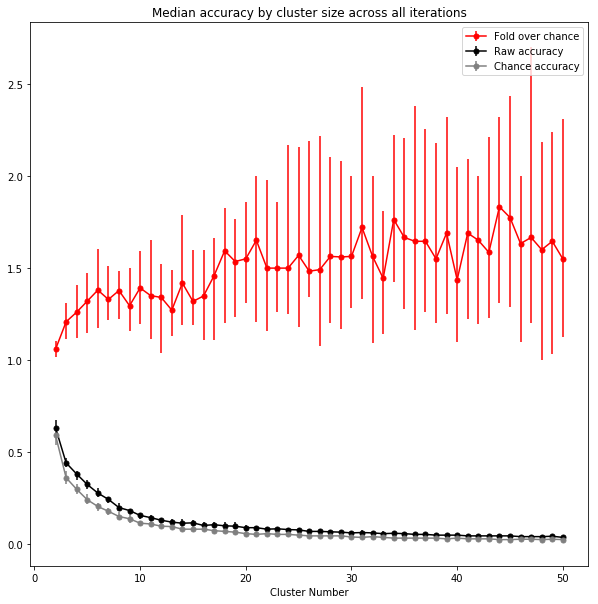

In [108]:
# outcome plot with error bars
fig, ax = plt.subplots(figsize=(10,10))
lower = [np.percentile(fold_over_chance[i,:], 25) for i in range(49)]
upper = [np.percentile(fold_over_chance[i,:], 75) for i in range(49)]
print(lower)
med = np.median(fold_over_chance, axis=1)
raw_med = np.median(raw_acc, axis=1)
raw_lower = [np.percentile(raw_acc[i,:], 25) for i in range(49)]
raw_upper = [np.percentile(raw_acc[i,:], 75) for i in range(49)]
norm_med = np.median(normalized_acc, axis=1)
norm_lower = [np.percentile(normalized_acc[i,:], 25) for i in range(49)]
norm_upper = [np.percentile(normalized_acc[i,:], 75) for i in range(49)]
plt.errorbar(cluster_sizes, med, yerr=[med-lower,upper-med], color = 'red',fmt='-o', markersize=5, label='Fold over chance')
plt.errorbar(cluster_sizes, raw_med, yerr=[raw_med-raw_lower,raw_upper-raw_med], color='black',fmt='-o', markersize=5, label='Raw accuracy')
plt.errorbar(cluster_sizes, norm_med, yerr=[norm_med-norm_lower, norm_upper-norm_med], color='grey',fmt='-o', markersize=5, label='Chance accuracy')
plt.legend()
plt.title("Median accuracy by cluster size across all iterations")
plt.xlabel("Cluster Number")
plt.savefig('/Users/ahyeon/Desktop/activ misc/dim2_median_errorbars.pdf')
plt.show()


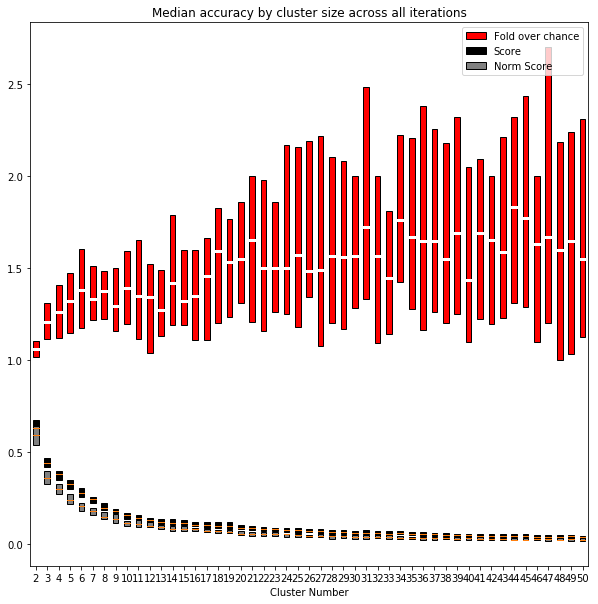

In [109]:
fig, ax = plt.subplots(figsize=(10,10))

medianprops = dict(linewidth=3, color='white')
foc = ax.boxplot(fold_over_chance.T, positions=cluster_sizes, showfliers=False, whis=False, patch_artist=True, boxprops=dict(facecolor="red"), medianprops=medianprops)
raw = ax.boxplot(raw_acc.T, positions=cluster_sizes, showfliers=False, whis=False, patch_artist=True, boxprops=dict(facecolor="black"))
norm = ax.boxplot(normalized_acc.T, positions=cluster_sizes, showfliers=False, whis=False, patch_artist=True, boxprops=dict(facecolor="grey"))

ax.legend([foc["boxes"][0],raw["boxes"][0],norm["boxes"][0]], ['Fold over chance', 'Score', 'Norm Score'], loc='upper right')

plt.title("Median accuracy by cluster size across all iterations")
plt.xlabel("Cluster Number")
plt.savefig('/Users/ahyeon/Desktop/activ misc/dim2_median_errorbars2.pdf')
plt.show()
